In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
import os
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv("https://raw.githubusercontent.com/skathirmani/datasets/master/credit-default.csv")
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
(credit['default'].value_counts()/credit.shape[0])*100

1    70.0
2    30.0
Name: default, dtype: float64

In [6]:
credit.shape

(1000, 21)

In [4]:
credit_dummies = pd.get_dummies(credit)

In [5]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(credit_dummies,test_size=0.3,random_state=100)

In [6]:
train_x = train.drop('default',axis=1)
train_y = train['default']

test_x = test.drop('default',axis=1)
test_y = test['default']

In [7]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(1,30))}
base_estimator = DecisionTreeClassifier(random_state=100)
cv_model = GridSearchCV(base_estimator,param_grid=params,cv=10)

cv_model.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
cv_model.best_params_

{'max_depth': 4}

In [20]:
model = DecisionTreeClassifier(random_state=100,max_depth=4)
model.fit(train_x,train_y)

pred_test = model.predict(test_x)

print(accuracy_score(test_y,pred_test))
print(classification_report(test_y,pred_test))

pred_probs_dt = pd.DataFrame(model.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_dt_5,tpr_dt_5,thr_dt_5 = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
thr_dt_5

0.6966666666666667
             precision    recall  f1-score   support

          1       0.78      0.81      0.80       219
          2       0.43      0.40      0.41        81

avg / total       0.69      0.70      0.69       300



array([2.        , 1.        , 0.94871795, 0.9       , 0.82222222,
       0.77777778, 0.73148148, 0.68181818, 0.6       , 0.4       ,
       0.34246575, 0.33333333, 0.2       , 0.        ])

In [21]:
model_rf = RandomForestClassifier(random_state = 100,
                                 n_estimators=300)
model_rf.fit(train_x,train_y)
pred = model_rf.predict(test_x)

print(accuracy_score(test_y,pred))
print(classification_report(test_y,pred))

pred_probs_rf = pd.DataFrame(model_rf.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_rf_5,tpr_rf_5,thr_rf_5 = roc_curve(test_y,pred_probs_rf['Pos'],pos_label=1)
thr_rf_5

0.7333333333333333
             precision    recall  f1-score   support

          1       0.78      0.88      0.83       219
          2       0.51      0.33      0.40        81

avg / total       0.71      0.73      0.71       300



array([0.98666667, 0.98333333, 0.96666667, 0.95      , 0.94666667,
       0.94333333, 0.92666667, 0.92      , 0.91666667, 0.91333333,
       0.91      , 0.90666667, 0.90333333, 0.9       , 0.89666667,
       0.88333333, 0.87666667, 0.87      , 0.86666667, 0.86      ,
       0.85666667, 0.85333333, 0.85      , 0.84333333, 0.84      ,
       0.83333333, 0.83      , 0.82666667, 0.82333333, 0.82      ,
       0.81666667, 0.81333333, 0.81      , 0.80666667, 0.80333333,
       0.79666667, 0.79333333, 0.79      , 0.78666667, 0.78      ,
       0.77666667, 0.77333333, 0.77      , 0.76666667, 0.76333333,
       0.76      , 0.75666667, 0.75333333, 0.75      , 0.74333333,
       0.74      , 0.73666667, 0.73333333, 0.72333333, 0.72      ,
       0.71666667, 0.71333333, 0.71      , 0.7       , 0.69666667,
       0.69333333, 0.68333333, 0.68      , 0.67666667, 0.67333333,
       0.67      , 0.66333333, 0.66      , 0.65666667, 0.65333333,
       0.65      , 0.64666667, 0.64      , 0.63333333, 0.63   

In [22]:
model_ab = AdaBoostClassifier(random_state = 100,
                                 n_estimators=300)
model_ab.fit(train_x,train_y)
pred_ab = model_ab.predict(test_x)

print(accuracy_score(test_y,pred_ab))
print(classification_report(test_y,pred_ab))

pred_probs_ab = pd.DataFrame(model_ab.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_ab_5,tpr_ab_5,thr_ab_5 = roc_curve(test_y,pred_probs_ab['Pos'],pos_label=1)
thr_ab_5

0.6933333333333334
             precision    recall  f1-score   support

          1       0.78      0.81      0.79       219
          2       0.42      0.37      0.39        81

avg / total       0.68      0.69      0.69       300



array([0.55086599, 0.52930104, 0.52921567, 0.505412  , 0.50531151,
       0.5049384 , 0.50486822, 0.50469708, 0.50468301, 0.50434406,
       0.50433101, 0.50369749, 0.50366119, 0.50329082, 0.50327911,
       0.50325181, 0.5032189 , 0.50320449, 0.50316605, 0.50309943,
       0.50309576, 0.50302533, 0.5029796 , 0.50265169, 0.50263499,
       0.50260498, 0.50257557, 0.5023967 , 0.50239468, 0.50229589,
       0.50229352, 0.50222929, 0.50222465, 0.50219939, 0.50213977,
       0.50208255, 0.50200444, 0.50177069, 0.50173747, 0.50170923,
       0.50169299, 0.50156291, 0.50149914, 0.50148464, 0.50145757,
       0.50131795, 0.50131436, 0.50120725, 0.50118675, 0.50110445,
       0.5010958 , 0.50101541, 0.50100585, 0.5009784 , 0.50095663,
       0.50088165, 0.50087816, 0.50066946, 0.50061044, 0.50050105,
       0.50038733, 0.5003838 , 0.50034592, 0.50029946, 0.50026134,
       0.50025641, 0.5002007 , 0.50015928, 0.50015728, 0.50011065,
       0.50010018, 0.50006447, 0.50005843, 0.5000249 , 0.49997

In [38]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_x,train_y)
pred_knn = model_knn.predict(test_x)
print(accuracy_score(test_y,pred_knn))
print(classification_report(test_y,pred_knn))

pred_probs_knn = pd.DataFrame(model_knn.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_knn_5,tpr_knn_5,thr_knn_5 = roc_curve(test_y,pred_probs_knn['Pos'],pos_label=1)

0.6766666666666666
             precision    recall  f1-score   support

          1       0.75      0.84      0.79       219
          2       0.35      0.23      0.28        81

avg / total       0.64      0.68      0.65       300



In [39]:
model_nb = GaussianNB()
model_nb.fit(train_x,train_y)
pred_class = model_nb.predict(test_x)
print(accuracy_score(test_y, pred_class))
print(classification_report(test_y, pred_class))

pred_probs_nb = pd.DataFrame(model_nb.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_nb_5,tpr_nb_5,thr_nb_5 = roc_curve(test_y,pred_probs_nb['Pos'],pos_label=1)

0.6833333333333333
             precision    recall  f1-score   support

          1       0.81      0.74      0.77       219
          2       0.43      0.54      0.48        81

avg / total       0.71      0.68      0.69       300



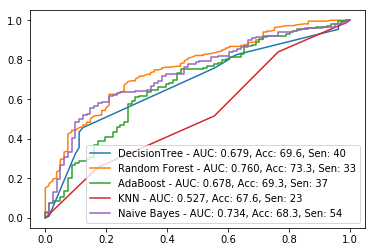

In [42]:
from sklearn.metrics import auc
auc_dt_5 = auc(fpr_dt_5,tpr_dt_5)
auc_rf_5 = auc(fpr_rf_5,tpr_rf_5)
auc_ab_5 = auc(fpr_ab_5,tpr_ab_5)
auc_knn_5 = auc(fpr_knn_5,tpr_knn_5)
auc_nb_5 = auc(fpr_nb_5,tpr_nb_5)
plt.plot(fpr_dt_5,tpr_dt_5)
plt.plot(fpr_rf_5,tpr_rf_5)
plt.plot(fpr_ab_5,tpr_ab_5)
plt.plot(fpr_knn_5,tpr_knn_5)
plt.plot(fpr_nb_5,tpr_nb_5)
plt.legend(['DecisionTree - AUC: %.3f, Acc: 69.6, Sen: 40' % auc_dt_5,
           'Random Forest - AUC: %.3f, Acc: 73.3, Sen: 33' % auc_rf_5,
           'AdaBoost - AUC: %.3f, Acc: 69.3, Sen: 37' % auc_ab_5,
           'KNN - AUC: %.3f, Acc: 67.6, Sen: 23' % auc_knn_5,
           'Naive Bayes - AUC: %.3f, Acc: 68.3, Sen: 54' % auc_nb_5])

# Random Forest Model is the best as it is giving the highest accuracy of 73%
-The best line in AUC curve is also Random Forest line